In [99]:
import pandas as pd
import datetime
from random import randint
from time import sleep
import os
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import geopandas as gpd
import seaborn as sns
from scipy.stats import pearsonr, mannwhitneyu
import scipy.stats as st

# (The NHL and the NHL Shield are registered trademarks of the 
# National Hockey League. NHL and NHL team marks are the property of 
# the NHL and its teams. © NHL 2023. All Rights Reserved.)

In [2]:
# Get game dates of games played

url = "https://en.wikipedia.org/wiki/List_of_Stanley_Cup_champions"

stanleycup_champs = pd.read_html(url)

stanleycup_byyear_df = stanleycup_champs[2]
stanleycup_byyear_df.head()

,Year,Winning team,Coach,Games,Losing team,Coach.1,Winning goal
0,1927,"Ottawa Senators (C) (5, 4–1)",Dave Gill,2–0,"Boston Bruins (A) (1, 0–1)",Art Ross,"Cy Denneny (7:30, second)"
1,1928,"New York Rangers (A) (1, 1–0)",Lester Patrick-playing,3–2,"Montreal Maroons (C) (2, 1–1)",Eddie Gerard,"Frank Boucher (3:35, third)"
2,1929,"Boston Bruins (A) (2, 1–1)",Art Ross,2–0,"New York Rangers (A) (2, 1–1)",Lester Patrick,"Bill Carson (18:02, third)"
3,1930,"Montreal Canadiens (C) (6, 3–2)",Cecil Hart,2–0,"Boston Bruins (A) (3, 1–2)",Art Ross,"Howie Morenz (1:00, second)"
4,1931,"Montreal Canadiens (C) (7, 4–2)",Cecil Hart,3–2,"Chicago Black Hawks (A) (1, 0–1)",Dick Irvin,"Johnny Gagnon (9:59, second)"


In [3]:
# Find Winning Teams from 1991-2002

stanleycup_winner_cleaned_df = stanleycup_byyear_df.loc[stanleycup_byyear_df['Year'].between(1992,2022)]
stanleycup_winner_cleaned_df = stanleycup_winner_cleaned_df[["Year", "Winning team"]]

stanleycup_winner_cleaned_df.reset_index(drop=True, inplace=True)

stanleycup_winner_cleaned_df["Year"] = (stanleycup_winner_cleaned_df["Year"] -1).map(str) + (stanleycup_winner_cleaned_df["Year"]).map(str)
stanleycup_winner_cleaned_df["Winning team"] = stanleycup_winner_cleaned_df["Winning team"].str.split('(').str[0]

stanleycup_winner_cleaned_df.drop(stanleycup_winner_cleaned_df[(stanleycup_winner_cleaned_df['Year'] == "20042005")].index, inplace=True)
stanleycup_winner_cleaned_df.rename(columns={"Winning team":"Team Name"}, inplace=True)
stanleycup_winner_cleaned_df["Team Name"] = stanleycup_winner_cleaned_df["Team Name"].str.strip()

# Change names 
stanleycup_winner_cleaned_df["Team Name"] = stanleycup_winner_cleaned_df["Team Name"].str.replace("Montreal Canadiens", "Montréal Canadiens")
stanleycup_winner_cleaned_df

,Year,Team Name
0,19911992,Pittsburgh Penguins
1,19921993,Montréal Canadiens
2,19931994,New York Rangers
3,19941995,New Jersey Devils
4,19951996,Colorado Avalanche
5,19961997,Detroit Red Wings
6,19971998,Detroit Red Wings
7,19981999,Dallas Stars
8,19992000,New Jersey Devils
9,20002001,Colorado Avalanche


In [4]:
# Find Losing Team from 1991-2002

stanleycup_losing_cleaned_df = stanleycup_byyear_df.loc[stanleycup_byyear_df['Year'].between(1992,2022)]
stanleycup_losing_cleaned_df = stanleycup_losing_cleaned_df[["Year", "Losing team"]]
stanleycup_losing_cleaned_df.reset_index(drop=True, inplace=True)

stanleycup_losing_cleaned_df["Year"] = (stanleycup_losing_cleaned_df["Year"] -1).map(str) + (stanleycup_losing_cleaned_df["Year"]).map(str)

stanleycup_losing_cleaned_df["Losing team"] = stanleycup_losing_cleaned_df["Losing team"].str.split('(').str[0]

stanleycup_losing_cleaned_df.drop(stanleycup_losing_cleaned_df[(stanleycup_losing_cleaned_df['Year'] == "20042005")].index, inplace=True)

stanleycup_losing_cleaned_df.rename(columns={"Losing team":"Team Name"}, inplace=True)
stanleycup_losing_cleaned_df["Team Name"] = stanleycup_losing_cleaned_df["Team Name"].str.strip()

# Change names 
stanleycup_losing_cleaned_df["Team Name"] = stanleycup_losing_cleaned_df["Team Name"].str.replace("Montreal Canadiens", "Montréal Canadiens")
stanleycup_losing_cleaned_df["Team Name"] = stanleycup_losing_cleaned_df["Team Name"].str.replace("Minnesota North Stars", "Dallas Stars")
stanleycup_losing_cleaned_df["Team Name"] = stanleycup_losing_cleaned_df["Team Name"].str.replace("Mighty Ducks of Anaheim", "Anaheim Ducks")

stanleycup_losing_cleaned_df

,Year,Team Name
0,19911992,Chicago Blackhawks
1,19921993,Los Angeles Kings
2,19931994,Vancouver Canucks
3,19941995,Detroit Red Wings
4,19951996,Florida Panthers
5,19961997,Philadelphia Flyers
6,19971998,Washington Capitals
7,19981999,Buffalo Sabres
8,19992000,Dallas Stars
9,20002001,New Jersey Devils


In [5]:
# Get Team Name and associated with its ID in the NHL API JSON request

teamID_url = "https://statsapi.web.nhl.com/api/v1/teams"
   
response = requests.get(teamID_url)

response_json = response.json()
team_info = {}

for team in response_json["teams"]:
    team_id = team["id"]
    team_name = team["name"]
    team_info[team_id] = team_name
   
team_info_df = pd.DataFrame.from_dict(team_info, orient="index", columns=["Team Name"])
team_info_df.reset_index(inplace=True)
team_info_df.columns = ["Team ID", "Team Name"]

team_info_df

,Team ID,Team Name
0,1,New Jersey Devils
1,2,New York Islanders
2,3,New York Rangers
3,4,Philadelphia Flyers
4,5,Pittsburgh Penguins
5,6,Boston Bruins
6,7,Buffalo Sabres
7,8,Montréal Canadiens
8,9,Ottawa Senators
9,10,Toronto Maple Leafs


In [6]:
# Merge dataframes to associate the Winning Team and Season won with the Team ID

stanleycup_winning_merge_byname_ID = pd.DataFrame.merge(stanleycup_winner_cleaned_df,team_info_df, on='Team Name', how='left')
stanleycup_winning_merge_byname_ID

,Year,Team Name,Team ID
0,19911992,Pittsburgh Penguins,5
1,19921993,Montréal Canadiens,8
2,19931994,New York Rangers,3
3,19941995,New Jersey Devils,1
4,19951996,Colorado Avalanche,21
5,19961997,Detroit Red Wings,17
6,19971998,Detroit Red Wings,17
7,19981999,Dallas Stars,25
8,19992000,New Jersey Devils,1
9,20002001,Colorado Avalanche,21


In [7]:
# Merge dataframes to associate the Losing Team and Season lost with the Team ID

stanleycup_losing_merge_byname_ID = pd.DataFrame.merge(stanleycup_losing_cleaned_df,team_info_df, on="Team Name", how='left')
stanleycup_losing_merge_byname_ID

,Year,Team Name,Team ID
0,19911992,Chicago Blackhawks,16
1,19921993,Los Angeles Kings,26
2,19931994,Vancouver Canucks,23
3,19941995,Detroit Red Wings,17
4,19951996,Florida Panthers,13
5,19961997,Philadelphia Flyers,4
6,19971998,Washington Capitals,15
7,19981999,Buffalo Sabres,7
8,19992000,Dallas Stars,25
9,20002001,New Jersey Devils,1


In [8]:
# Get Roster for each Winning team per Season.  

player_list = []
base_url = "https://statsapi.web.nhl.com/api/v1/teams/{}?expand=team.roster&season={}"
for index, row in stanleycup_winning_merge_byname_ID.iterrows():
    team_ids = row ["Team ID"]
    # print(team_ids)
    year_cl= row ["Year"]
    # print(year_cl)
    url = base_url.format(team_ids, year_cl)
    # print(url)
    response = requests.get(url)
    data = response.json()
    
    for player in data["teams"][0]["roster"]["roster"]:
        
        person = player["person"]["fullName"]
        # Create dictionary
        player_id = player["person"]["id"]
        # Printing for testing purposes
        #print("Name:", person)
        #print("ID:", player_id)
        player_list.append({
            "Name":person,
            "Player ID":player_id,
            "Team ID": team_ids,
            "Season":year_cl
        })
winning_df=pd.DataFrame(player_list)
winning_df.head()
     

,Name,Player ID,Team ID,Season
0,Phil Bourque,8445629,5,19911992
1,Jay Caufield,8446013,5,19911992
2,Jeff Chychrun,8446050,5,19911992
3,Paul Coffey,8446117,5,19911992
4,Jeff Daniels,8446305,5,19911992


In [9]:
# Get Roster for each Losing team per Season
player_list = []
base_url = "https://statsapi.web.nhl.com/api/v1/teams/{}?expand=team.roster&season={}"
for index, row in stanleycup_losing_merge_byname_ID.iterrows():
    team_ids = row ["Team ID"]
    # print(team_ids)
    year_cl= row ["Year"]
    # print(year_cl)
    url = base_url.format(team_ids, year_cl)
    # print(url)
    response = requests.get(url)
    data = response.json()
    
    for player in data["teams"][0]["roster"]["roster"]:
        
        person = player["person"]["fullName"]
        # Create dictionary
        player_id = player["person"]["id"]
        # Printing for testing purposes
        #print("Name:", person)
        #print("ID:", player_id)
        player_list.append({
            "Name":person,
            "Player ID":player_id,
            "Team ID": team_ids,
            "Season":year_cl
        })
losing_df=pd.DataFrame(player_list)
losing_df.head()

,Name,Player ID,Team ID,Season
0,Rob Brown,8445689,16,19911992
1,Keith Brown,8445713,16,19911992
2,Rod Buskas,8445796,16,19911992
3,Shawn Byram,8445823,16,19911992
4,Chris Chelios,8446053,16,19911992


In [10]:
   
# Player Profile - Winning Team per Season

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}"
player_ages = []
player_nationalities = []

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    url = base_url.format(player_id)
    response = requests.get(url)
    data = response.json()

    player_age = data['people'][0]['birthDate']
    player_nationality = data['people'][0]['nationality']
    player_birthyear_yyyy = player_age[:4]
    winning_season_yyyy = row["Season"][4:]

    winning_age = (int(winning_season_yyyy)) - (int(player_birthyear_yyyy))
    
    player_ages.append(winning_age)
    player_nationalities.append(player_nationality)


In [11]:
winning_df["Age"] = player_ages
winning_df["Nationality"] = player_nationalities
winning_df.head()

,Name,Player ID,Team ID,Season,Age,Nationality
0,Phil Bourque,8445629,5,19911992,30,USA
1,Jay Caufield,8446013,5,19911992,32,USA
2,Jeff Chychrun,8446050,5,19911992,26,CAN
3,Paul Coffey,8446117,5,19911992,31,CAN
4,Jeff Daniels,8446305,5,19911992,24,CAN


In [12]:
# Player Profile - Losing Team per Season
base_url = "https://statsapi.web.nhl.com/api/v1/people/{}"
player_ages = []
player_nationalities = []
for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    url = base_url.format(player_id)
    response = requests.get(url)
    data = response.json()

    player_age = data['people'][0]['birthDate']
    
    player_nationality = data['people'][0]['nationality']
    player_birthyear_yyyy = player_age[:4]
    losing_season_yyyy = row["Season"][4:]

    losing_age = (int(losing_season_yyyy)) - (int(player_birthyear_yyyy))
    
    player_ages.append(losing_age)
    player_nationalities.append(player_nationality)

In [13]:
losing_df["Age"] = player_ages
losing_df["Nationality"] = player_nationalities
losing_df.head()

,Name,Player ID,Team ID,Season,Age,Nationality
0,Rob Brown,8445689,16,19911992,24,CAN
1,Keith Brown,8445713,16,19911992,32,CAN
2,Rod Buskas,8445796,16,19911992,31,CAN
3,Shawn Byram,8445823,16,19911992,24,CAN
4,Chris Chelios,8446053,16,19911992,30,USA


In [14]:
# Get averave age per season of winning seasons

for row in winning_df:
    avg_player_age = winning_df. groupby(by='Season')['Age'].mean().round()
avg_player_age_winning_df = pd.DataFrame(avg_player_age)
avg_player_age_winning_df

,Age
Season,
19911992,28.0
19921993,26.0
19931994,29.0
19941995,28.0
19951996,26.0
19961997,29.0
19971998,29.0
19981999,29.0
19992000,28.0


In [15]:
# Get averave age per season of losing seasons
for row in losing_df:
    avg_player_age = losing_df. groupby(by='Season')['Age'].mean().round()
    
avg_player_age_losing_df = pd.DataFrame(avg_player_age)
avg_player_age_losing_df

,Age
Season,
19911992,27.0
19921993,27.0
19931994,26.0
19941995,28.0
19951996,27.0
19961997,28.0
19971998,28.0
19981999,27.0
19992000,28.0


In [16]:
# Nationality Count from 19911992 season

player_nat_1992 = winning_df.loc[winning_df['Season'] == "19911992"]["Nationality"]
player_nat_1992.value_counts()


CAN    21
USA    10
CZE     2
SWE     2
KOR     1
GBR     1
Name: Nationality, dtype: int64

In [17]:
# Nationality Count from 20212022 season

player_nat_2022 = winning_df.loc[winning_df['Season'] == "20212022"]["Nationality"]
player_nat_2022.value_counts()


CAN    17
USA    10
FIN     4
SWE     3
RUS     2
CZE     2
DEU     1
Name: Nationality, dtype: int64

In [18]:
# Building Penalty In Minutes (PIM) for Winning DF

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}" 
pim=[]

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        pim_data = data["stats"][0]["splits"][0]['stat']['pim']
        print(pim_data)
        pim.append(pim_data)
        
    except:
        print("not found")
        pim.append(0)    
        pass

58
175
111
87
0
0
119
30
16
34
104
8
94
127
30
48
36
4
96
87
110
206
62
254
57
151
54
0
2
0
not found
not found
not found
not found
not found
not found
not found
44
19
79
20
57
98
98
63
32
193
117
95
33
20
24
77
205
146
142
90
91
65
4
2
2
14
54
2
20
0
10
not found
not found
not found
62
170
8
62
29
127
70
47
129
139
41
67
33
70
91
57
76
69
28
40
114
17
110
37
2
7
58
0
0
36
39
154
6
2
not found
not found
20
24
19
16
12
14
54
18
2
18
86
44
32
36
167
10
56
4
0
0
72
13
17
0
25
27
6
18
17
0
8
not found
not found
56
32
46
4
20
49
117
73
22
146
52
147
44
50
50
88
85
20
49
0
250
14
47
68
33
54
14
2
30
142
6
6
0
not found
not found
not found
8
73
47
30
76
218
70
26
20
0
58
69
131
78
26
151
46
30
5
52
52
167
129
0
126
75
10
28
33
not found
not found
not found
12
45
25
72
40
92
40
65
37
57
154
46
46
18
47
106
81
16
119
157
89
32
6
43
44
0
not found
not found
not found
54
31
18
26
30
62
34
10
87
44
34
16
50
33
133
102
16
50
20
51
0
85
10
18
62
23
19
0
2
16
12
10
not found
not found
not found
98
10

In [19]:
# Building Penalty In Minutes (PIM) for Losing DF

Lpim=[]

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        pim_data = data["stats"][0]["splits"][0]['stat']['pim']
        print(pim_data)
        Lpim.append(pim_data)
        
    except:
        print("not found")
        Lpim.append(0)    
        pass

73
69
91
0
245
118
35
54
69
89
234
72
10
92
2
97
36
6
2
65
80
168
64
20
81
408
98
34
304
8
36
97
51
56
12
4
4
0
4
2
not found
not found
not found
not found
152
6
32
25
77
12
20
45
11
171
6
89
64
30
38
84
399
42
61
100
314
57
49
97
18
109
2
27
2
16
63
76
12
10
36
19
80
not found
not found
not found
not found
20
190
52
56
24
49
123
30
131
72
34
53
171
50
73
38
149
6
109
271
6
42
86
21
64
9
86
82
18
18
10
2
not found
not found
16
60
21
39
72
22
58
24
2
6
147
46
10
6
99
23
36
17
8
40
14
101
45
6
2
16
14
2
73
88
not found
not found
80
0
75
36
37
25
0
36
160
30
16
129
20
46
14
0
6
236
21
32
57
41
94
107
0
4
137
46
2
20
not found
not found
41
38
50
12
85
32
2
58
99
71
0
47
94
237
35
20
210
163
41
65
64
136
10
2
0
8
58
4
0
0
22
not found
not found
6
189
44
32
42
16
24
103
30
30
41
36
20
70
39
18
4
26
46
12
38
4
80
66
14
0
15
112
12
0
28
6
0
2
6
10
18
not found
not found
0
16
261
52
30
0
22
114
16
22
44
44
62
96
45
81
177
0
47
2
44
102
62
38
84
8
56
61
75
17
37
0
not found
not found
not found
3

In [20]:
# Building Power Play Goals for Winning DF

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}" 
power_play_goal=[]

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        ppg_data = data["stats"][0]["splits"][0]['stat']['powerPlayGoals']
        print(ppg_data)
        power_play_goal.append(ppg_data)
        
    except:
        print("not found")
        power_play_goal.append(0)    
        pass

0
0
0
5
0
0
0
5
0
4
0
1
12
0
14
7
0
0
20
1
0
1
0
19
0
8
3
0
0
0
not found
not found
not found
not found
not found
not found
not found
16
0
4
0
0
9
7
6
0
0
6
0
2
8
1
12
0
5
0
4
3
0
0
0
0
0
1
0
0
0
0
not found
not found
not found
7
1
0
11
1
20
0
0
0
0
6
17
0
0
1
3
6
10
0
5
5
0
0
4
0
0
1
0
0
4
9
7
0
0
not found
not found
2
2
0
0
2
1
0
1
3
0
1
0
2
1
0
1
1
0
1
0
4
0
0
0
0
0
0
4
2
0
0
not found
not found
0
1
0
0
0
2
9
0
0
16
3
0
17
0
7
1
18
0
6
0
4
3
7
9
0
8
1
0
0
3
0
0
0
not found
not found
not found
1
1
0
9
0
0
0
2
5
0
0
1
20
8
1
0
3
8
0
0
0
5
0
0
5
0
0
0
3
not found
not found
not found
6
1
2
0
5
0
3
0
2
0
15
6
6
7
0
4
0
0
3
5
2
1
0
0
1
0
not found
not found
not found
2
0
1
2
15
1
0
0
0
6
8
1
0
0
8
3
1
9
5
1
0
2
0
7
4
0
0
0
0
0
0
0
not found
not found
not found
0
7
7
3
5
1
0
0
0
1
0
1
5
1
7
0
0
2
1
0
5
1
0
9
0
0
0
0
0
7
1
not found
not found
not found
10
2
0
0
19
1
2
0
0
12
0
7
0
0
0
0
0
11
12
0
0
0
0
0
1
0
2
7
3
3
not found
not found
not found
not found
1
0
1
10
0
7
0
4
0
13
12
5
6
1
0
0


In [21]:
# Building Power Play Goals for Losing DF

Lpower_play_goal=[]

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        ppg_data = data["stats"][0]["splits"][0]['stat']['powerPlayGoals']
        print(ppg_data)
        Lpower_play_goal.append(ppg_data)
        
    except:
        print("not found")
        Lpower_play_goal.append(0)    
        pass

16
2
0
0
2
4
0
0
9
6
0
0
0
2
0
1
1
0
0
11
0
2
1
0
4
2
22
0
3
1
8
3
2
0
0
1
0
0
0
0
not found
not found
not found
not found
10
0
17
0
5
0
0
8
0
14
0
0
0
12
12
0
3
9
0
24
0
8
1
0
0
1
0
1
0
0
0
0
0
0
0
0
5
not found
not found
not found
not found
5
0
0
7
3
1
12
2
0
0
3
1
0
1
10
0
4
0
0
4
0
10
25
0
0
0
1
4
0
1
0
0
not found
not found
1
0
0
6
4
0
0
7
3
0
0
0
0
0
1
0
0
11
2
4
2
0
5
7
0
0
0
0
0
1
not found
not found
1
0
1
8
0
2
0
0
19
4
14
0
2
8
8
0
0
0
2
3
0
6
7
11
0
1
2
0
0
0
not found
not found
8
1
5
1
0
6
0
10
0
0
0
0
1
0
2
5
0
1
0
1
0
9
2
0
0
0
1
0
0
0
1
not found
not found
5
0
11
4
1
0
4
0
10
0
0
3
0
0
0
1
0
4
0
0
4
0
2
2
1
0
0
0
4
0
2
0
0
0
0
2
0
not found
not found
0
0
0
1
13
0
2
0
1
1
0
2
4
3
5
10
1
0
0
0
13
4
0
0
0
0
5
1
0
0
0
0
not found
not found
not found
0
0
5
11
0
0
11
3
7
0
1
0
0
1
5
3
0
0
1
1
0
0
0
4
0
0
0
0
0
0
1
2
0
3
0
0
0
not found
not found
1
0
3
12
0
12
3
0
1
2
0
1
1
3
8
0
9
8
0
1
0
0
0
0
0
0
2
6
0
0
not found
not found
not found
not found
5
0
14
3
1
0
4
0
3
0
0
0
0
11
0

In [22]:
# Building Over Time Goal for Winning DF

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}" 
over_time_goal=[]

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        otg_data = data["stats"][0]["splits"][0]['stat']['overTimeGoals']
        print(otg_data)
        over_time_goal.append(otg_data)
        
    except:
        print("not found")
        over_time_goal.append(0)    
        pass

1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
not found
not found
not found
not found
not found
not found
not found
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
not found
not found
not found
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
0
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
not found
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
1
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
not found
not found
not found
0
0
0
0
2
0
0
0
0
2
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
not found
1
1
0
1
0
2
0
0
0
1
2
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
no

In [23]:
# Building Power Play Goals for Losing DF

Lover_time_goal=[]

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        otg_data = data["stats"][0]["splits"][0]['stat']['overTimeGoals']
        print(otg_data)
        Lover_time_goal.append(otg_data)
        
    except:
        print("not found")
        Lover_time_goal.append(0)    
        pass

0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
not found
not found
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
not found
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
not found
not found
0
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
not found
not found
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
not found
not found
not found
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
not found
not found
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
3
0
0
0
0
0
0
0
0
1
0
0
0
not found
not found
not found
not found
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0


In [24]:
# Building Plus Minus (+/-) for Winning DF

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}" 
plus_mins=[]

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        pm_data = data["stats"][0]["splits"][0]['stat']['plusMinus']
        print(pm_data)
        plus_mins.append(pm_data)
        
    except:
        print("not found")
        plus_mins.append(0)    
        pass

-6
-6
-12
1
0
-2
1
-7
4
12
-1
-2
27
-5
12
33
0
5
-21
19
1
2
-8
8
7
15
-11
1
-1
0
not found
not found
not found
not found
not found
not found
not found
4
13
6
-9
25
5
20
5
0
6
7
29
11
23
14
8
35
-24
2
1
8
4
1
-4
0
11
-5
-3
6
-1
2
not found
not found
not found
-5
18
-4
20
-3
27
-5
-5
-9
-16
14
28
-12
4
-14
15
25
7
-1
-5
5
-13
4
0
-8
1
12
0
-1
13
20
18
0
-2
not found
not found
9
1
-1
-4
2
-1
4
-1
1
9
2
10
13
6
5
8
4
6
-5
-2
6
-5
4
-1
-7
-1
3
19
5
-3
12
not found
not found
29
3
-5
4
1
26
14
32
15
-33
1
6
14
25
2
27
14
12
20
0
10
7
26
18
10
2
-1
1
15
20
3
-2
1
not found
not found
not found
-3
-11
-5
29
26
-8
-7
31
3
0
8
6
32
22
-18
38
21
11
0
-6
-9
-14
1
-1
14
3
5
-10
-10
not found
not found
not found
17
5
10
4
4
7
14
-17
35
-9
6
3
14
22
-1
0
3
2
-7
0
11
21
1
5
6
0
not found
not found
not found
-10
-3
6
2
19
-2
-5
0
5
29
11
0
-2
2
11
21
4
-1
9
23
0
1
-1
29
10
-2
3
-3
0
-3
1
-1
not found
not found
not found
13
7
-3
8
3
-9
30
2
-6
1
1
19
-12
0
22
-6
0
12
-2
-6
24
-13
-2
16
1
0
3
1
7
14
21
not

In [25]:
# Building Plus Minus (+/-) for Losing DF

Lplus_mins=[]

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        pm_data = data["stats"][0]["splits"][0]['stat']['plusMinus']
        print(pm_data)
        Lplus_mins.append(pm_data)
        
    except:
        print("not found")
        Lplus_mins.append(0)    
        pass

-15
7
-13
0
24
-5
-4
-3
20
-5
-2
-7
2
-11
0
-1
3
-5
0
10
-2
-4
5
1
9
1
23
-8
23
0
-10
8
-5
-6
1
-1
0
-2
-3
1
not found
not found
not found
not found
18
-1
-2
-2
16
-6
-16
17
-9
-1
6
-2
16
-25
19
-14
1
16
-10
18
-15
12
1
-12
-3
7
-3
3
0
0
-2
-4
1
0
-10
-4
-3
not found
not found
not found
not found
-1
-11
0
-11
-15
-3
15
5
18
2
-8
-19
-7
3
6
-9
-2
0
4
13
-5
7
1
0
-7
3
0
-22
-7
-3
-2
-1
not found
not found
14
13
7
12
18
1
13
6
1
-4
-11
-10
-3
3
17
11
14
11
4
6
1
10
12
15
0
3
4
1
1
5
not found
not found
10
0
-3
-10
4
5
1
-2
4
5
-19
6
-4
-12
-5
-1
-2
-2
-1
-9
13
-19
-3
1
1
-3
-3
4
-1
5
not found
not found
2
11
25
-5
-12
9
-2
44
12
-11
-2
17
10
2
6
9
-1
-1
7
36
27
31
-8
2
0
1
12
3
0
0
3
not found
not found
-3
-3
14
5
-3
-2
-10
1
-11
-3
-2
6
5
15
9
-11
2
-8
-3
1
-1
0
9
2
1
0
-17
-11
2
0
-2
1
0
0
1
-5
-5
not found
not found
1
12
-2
28
-11
2
-4
0
4
8
-9
10
16
-6
2
7
-12
-1
12
0
24
21
-1
-6
2
-1
23
11
20
0
6
3
not found
not found
not found
10
-2
3
-21
9
12
0
-3
-1
0
-12
3
6
-5
6
-2
7
0
-5
0
1
-1

In [26]:
# Building Points for Winning DF

base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}" 
points=[]

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        points_data = data["stats"][0]["splits"][0]['stat']['points']
        print(points_data)
        points.append(points_data)
        
    except:
        print("not found")
        points.append(0)    
        pass

26
0
4
69
0
0
35
54
16
69
9
9
131
26
87
77
8
10
97
24
16
15
10
123
4
59
29
4
0
0
not found
not found
not found
not found
not found
not found
not found
88
25
31
17
18
97
45
48
3
14
25
60
44
80
32
94
16
18
8
50
44
14
6
0
0
17
8
0
12
0
3
not found
not found
not found
41
16
6
64
15
79
2
11
3
8
60
79
2
19
32
38
84
41
8
35
54
19
9
42
4
0
18
0
2
49
89
56
2
1
not found
not found
15
32
16
18
21
9
3
16
15
20
19
12
29
23
11
39
22
1
5
1
25
2
3
0
18
0
3
19
18
0
14
not found
not found
20
17
27
3
9
16
71
19
21
69
27
8
120
27
60
16
85
15
56
0
34
20
116
75
9
54
3
2
27
48
1
1
1
not found
not found
not found
13
13
12
63
28
4
3
54
45
0
13
42
88
85
32
38
45
57
0
7
7
33
11
1
49
8
6
12
9
not found
not found
not found
42
23
17
14
27
11
47
7
52
12
57
69
52
59
10
34
9
13
43
37
23
21
2
17
22
0
not found
not found
not found
29
16
11
27
58
29
1
0
8
81
55
17
3
5
34
30
20
48
51
12
0
31
0
52
45
0
3
0
0
8
1
0
not found
not found
not found
6
46
47
39
44
24
29
2
4
5
26
38
31
20
56
11
15
35
16
0
68
10
11
72
11
0
3
0
25
7

In [27]:
# Building Points for Losing DF

Lpoints=[]

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id,year)
    response = requests.get(url)
    data = response.json()
    try:
        points_data = data["stats"][0]["splits"][0]['stat']['points']
        print(points_data)
        Lpoints.append(points_data)
        
    except:
        print("not found")
        Lpoints.append(0)    
        pass

47
16
4
0
56
36
12
2
63
47
4
9
15
29
0
28
13
1
0
74
16
15
14
2
31
9
103
0
30
8
60
78
14
8
0
4
0
2
9
0
not found
not found
not found
not found
59
0
73
1
87
0
17
69
1
82
65
14
27
41
87
8
41
39
1
125
13
52
15
1
2
20
5
23
0
6
29
4
2
0
8
3
48
not found
not found
not found
not found
37
3
32
66
28
14
70
55
5
11
28
15
7
55
61
9
27
2
20
29
10
68
107
4
12
6
38
15
7
6
5
0
not found
not found
21
14
3
43
58
8
21
50
15
1
1
5
6
5
42
3
8
40
15
38
8
14
33
26
0
4
11
1
10
13
not found
not found
13
4
34
51
23
37
1
24
70
30
60
27
10
44
41
0
3
9
11
34
34
43
57
61
1
2
21
3
2
27
not found
not found
59
34
46
15
13
34
0
97
32
9
0
7
14
8
19
45
5
8
32
59
24
79
23
5
1
1
44
15
0
1
21
not found
not found
9
15
78
28
25
4
31
26
35
14
14
76
9
10
17
21
0
31
6
0
17
0
34
21
16
0
10
8
23
1
26
3
0
0
1
5
16
not found
not found
4
8
4
15
36
0
43
3
20
30
14
44
43
33
34
56
22
0
3
0
66
50
4
13
8
0
47
31
6
1
10
0
not found
not found
not found
16
0
35
59
34
10
81
22
34
3
14
11
24
4
34
42
25
8
8
13
8
5
10
39
1
0
3
4
5
0
3
8
0
33
12


In [28]:
winning_df['PIM'] = pim 
winning_df['PPG'] = power_play_goal
winning_df['OTG'] = over_time_goal
winning_df['+/-'] = plus_mins
winning_df['Pts'] = points
winning_df.head()

,Name,Player ID,Team ID,Season,Age,Nationality,PIM,PPG,OTG,+/-,Pts
0,Phil Bourque,8445629,5,19911992,30,USA,58,0,1,-6,26
1,Jay Caufield,8446013,5,19911992,32,USA,175,0,0,-6,0
2,Jeff Chychrun,8446050,5,19911992,26,CAN,111,0,0,-12,4
3,Paul Coffey,8446117,5,19911992,31,CAN,87,5,0,1,69
4,Jeff Daniels,8446305,5,19911992,24,CAN,0,0,0,0,0


In [29]:
losing_df['PIM'] = Lpim 
losing_df['PPG'] = Lpower_play_goal
losing_df['OTG'] = Lover_time_goal
losing_df['+/-'] = Lplus_mins
losing_df['Pts'] = Lpoints
losing_df.head()

,Name,Player ID,Team ID,Season,Age,Nationality,PIM,PPG,OTG,+/-,Pts
0,Rob Brown,8445689,16,19911992,24,CAN,73,16,0,-15,47
1,Keith Brown,8445713,16,19911992,32,CAN,69,2,0,7,16
2,Rod Buskas,8445796,16,19911992,31,CAN,91,0,0,-13,4
3,Shawn Byram,8445823,16,19911992,24,CAN,0,0,0,0,0
4,Chris Chelios,8446053,16,19911992,30,USA,245,2,0,24,56


In [30]:
# Get averave PIM of winning team over 29 seasons

for row in winning_df:
    avg_player_pim = winning_df. groupby(by='Season')['PIM'].mean().round()
avg_player_pim_winning_df = pd.DataFrame(avg_player_pim)
avg_player_pim_winning_df.mean()

PIM    34.366667
dtype: float64

In [31]:
# Get averave PIM of losing team over 29 seasons

for row in losing_df:
    avg_player_pim = losing_df. groupby(by='Season')['PIM'].mean().round()
avg_player_pim_losing_df = pd.DataFrame(avg_player_pim)
avg_player_pim_losing_df.mean()

PIM    35.033333
dtype: float64

In [32]:
# Get averave OT goals of winning team over 29 seasons

for row in winning_df:
    avg_player_otg = winning_df. groupby(by='Season')['OTG'].mean()
avg_player_otg_winning_df = pd.DataFrame(avg_player_otg)
avg_player_otg_winning_df.mean()

OTG    0.14106
dtype: float64

In [33]:
# Get averave OT goals of losing team over 29 seasons

for row in losing_df:
    avg_player_otg = losing_df. groupby(by='Season')['OTG'].mean()
avg_player_otg_losing_df = pd.DataFrame(avg_player_otg)
avg_player_otg_losing_df.mean()

OTG    0.125846
dtype: float64

In [34]:
# Get averave PP goals of winning team over 29 seasons

for row in winning_df:
    avg_player_ppg = winning_df. groupby(by='Season')['PPG'].mean().round()
avg_player_ppg_winning_df = pd.DataFrame(avg_player_ppg)
avg_player_ppg_winning_df.mean()

PPG    2.0
dtype: float64

In [35]:
# Get averave PP goals of losing team over 29 seasons

for row in losing_df:
    avg_player_ppg = losing_df. groupby(by='Season')['PPG'].mean().round()
avg_player_ppg_losing_df = pd.DataFrame(avg_player_ppg)
avg_player_ppg_losing_df.mean()

PPG    2.066667
dtype: float64

In [36]:
# Get averave points of winning team over 29 seasons

for row in winning_df:
    avg_player_pts = winning_df. groupby(by='Season')['Pts'].mean().round()
avg_player_pts_winning_df = pd.DataFrame(avg_player_pts)
avg_player_pts_winning_df.mean()

Pts    21.933333
dtype: float64

In [37]:
# Get averave points of losing team over 29 seasons

for row in losing_df:
    avg_player_pts = losing_df. groupby(by='Season')['Pts'].mean().round()
avg_player_pts_losing_df = pd.DataFrame(avg_player_pts)
avg_player_pts_losing_df.mean()

Pts    20.266667
dtype: float64

In [38]:
# Get averave +/- of winning team over 29 seasons

for row in winning_df:
    avg_player_plusminus = winning_df. groupby(by='Season')['+/-'].mean().round()
avg_player_plusminus_winning_df = pd.DataFrame(avg_player_plusminus)
avg_player_plusminus_winning_df.mean()

+/-    4.5
dtype: float64

In [39]:
# Get averave +/- of losing team over 29 seasons

for row in losing_df:
    avg_player_plusminus = losing_df. groupby(by='Season')['+/-'].mean().round()
avg_player_plusminus_losing_df = pd.DataFrame(avg_player_plusminus)
avg_player_plusminus_losing_df.mean()

+/-    2.1
dtype: float64

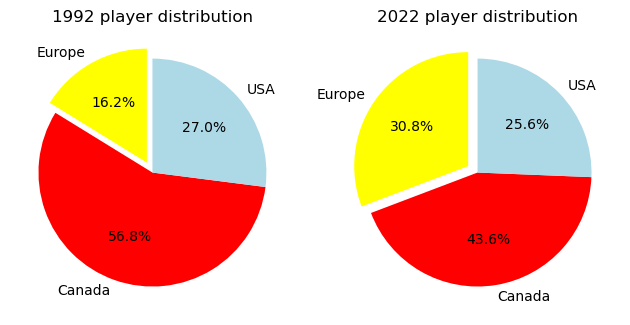

There is a noticeable increase in European players when comparing the most recent winning team's roster vs that of 1991-1992. Canadian representation has had a significant reduction, and the U.S. remains constant, but most recently had the lowest representation.


In [68]:
# Pie chart, then and now comparison of nationality breakdown for the 1992 and 2022 winning teams
# Labels for the sections of our pie chart
labels = ["Europe", "Canada", 'USA']

# The values of each section of the pie chart.  Player total count value for each continent
sizes = [6, 21, 10]

# The colors of each section of the pie chart
colors = ["yellow", "red", 'lightblue']

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0, 0)

# Labels for current the sections of our pie chart
labels2 = ["Europe", "Canada", 'USA']

# The values of each section of the pie chart.  Player total count value for each continent
sizes2 = [12, 17, 10]

# The colors of each section of the pie chart
colors2 = ["yellow", "red", "lightblue"]

# Tells matplotlib to separate the "Humans" section from the others
explode2 = (0.1, 0, 0)

# Create a figure with two subplots arranged side by side
fig, (ax1, ax2) = plt.subplots(1, 2)

# Plot the first pie chart in the left subplot
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title("1992 player distribution")

# Plot the second pie chart in the right subplot
ax2.pie(sizes2, explode=explode2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90)
ax2.set_title("2022 player distribution")

# Adjust the spacing between subplots
fig.tight_layout()

# Save the figure
plt.savefig("output/Fig1.png")

# Display the figure with the two pie charts
plt.show()

print(f"There is a noticeable increase in European players when comparing the most recent winning team's roster vs that of 1991-1992. Canadian representation has had a significant reduction, and the U.S. remains constant, but most recently had the lowest representation.")

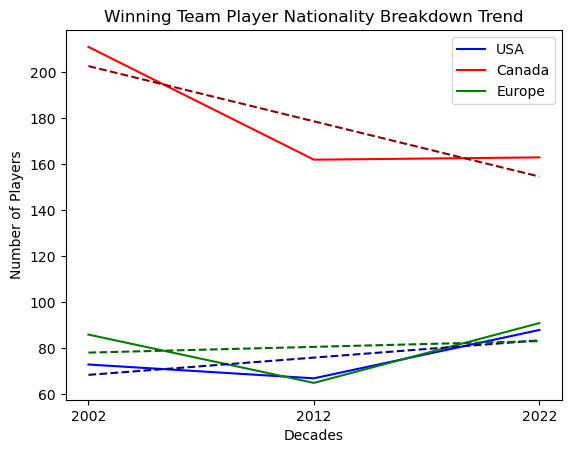

The Canadian player reduction in representation was most significantly impacted in the decade of 2003-2012 and has remained consistent since.


In [103]:
# line graph with trendline to identify geographical shifts in player's nationality/hockey program per country
nationalities = ['USA', 'Canada', 'Europe']
decades = [2002, 2012, 2022]
data_points = {
    'USA': [73, 67, 88],
    'Canada': [211, 162, 163],
    'Europe': [86, 65, 91],  
}

# Define colors for the lines and trendlines
line_colors = ['blue', 'red', 'green']
trendline_colors = ['darkblue', 'darkred', 'darkgreen']

# Create line graph
for i, nationality in enumerate(nationalities):
    plt.plot(decades, data_points[nationality], label=nationality, color=line_colors[i])

# Add trendline (linear regression)
for i, nationality in enumerate(nationalities):
    z = np.polyfit(decades, data_points[nationality], 1)
    p = np.poly1d(z)
    plt.plot(decades, p(decades), '--', color=trendline_colors[i])

# Set labels and title
plt.xlabel('Decades')
plt.ylabel('Number of Players')
plt.title('Winning Team Player Nationality Breakdown Trend')

# Set x-axis tick positions and labels
plt.xticks(decades, ['2002', '2012', '2022'])

# Remove decimals from y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick_number: f'{int(value)}'))

# Add legend
plt.legend()

# Save the figure
plt.savefig("output/Fig2.png")

# Display the plot
plt.show()

print("The Canadian player reduction in representation was most significantly impacted in the decade of 2003-2012 and has remained consistent since.")


In [42]:
# plus minus win
base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}"
plus_mins_win = []

for index, row in winning_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id, year)
    response = requests.get(url)
    data = response.json()
    
    try:
        pm_data_win = data["stats"][0]["splits"][0]['stat']['plusMinus']
        #print(pm_data_win)
        plus_mins_win.append(pm_data_win)  # Store each value in a separate list
        
    except:
        #print("not found")
        plus_mins_win.append(0)  # Store 0 for missing values
        
overall_mean_win = sum(plus_mins_win) / len(plus_mins_win)
overall_mean_win

4.4821073558648115

In [43]:
# plus minus lose
base_url = "https://statsapi.web.nhl.com/api/v1/people/{}/stats?stats=statsSingleSeason&season={}"
plus_mins_lose = []

for index, row in losing_df.iterrows():
    player_id = row["Player ID"]
    year = row["Season"]
    url = base_url.format(player_id, year)
    response = requests.get(url)
    data = response.json()
    
    try:
        pm_data_lose = data["stats"][0]["splits"][0]['stat']['plusMinus']
        #print(pm_data_lose)
        plus_mins_lose.append(pm_data_lose)  # Store each value in a separate list
        
    except:
        #print("not found")
        plus_mins_lose.append(0)  # Store 0 for missing values
        
overall_mean_lose = sum(plus_mins_lose) / len(plus_mins_lose)
overall_mean_lose


2.000952380952381

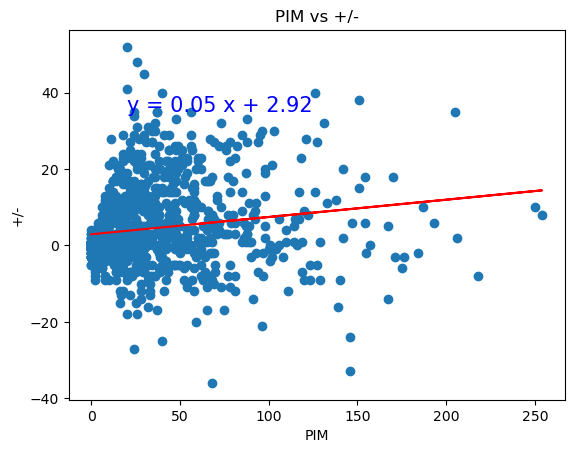

The correlation between PIM and +/- is 0.16.  Except for outliers, the lower a player's PIM, the more likely of a more positive +/- result.


In [97]:

correlation_co = st.pearsonr(winning_df["PIM"],winning_df["+/-"])
#Print the correaltion anser

#Calculate linear regression
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(winning_df["PIM"],winning_df["+/-"])
regress_values=winning_df["PIM"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(winning_df["PIM"],winning_df["+/-"],color='tab:blue')
plt.plot(winning_df["PIM"], regress_values, color='red')
plt.annotate(line_eq,(160,-35), fontsize=15, color = "blue")
plt.xlabel("PIM")
plt.ylabel("+/-")
plt.title("PIM vs +/-")
# Save the figure
plt.savefig("output/Fig3.png")
plt.show()
print(f"The correlation between PIM and +/- is {round(correlation_co[0],2)}.  Except for outliers, the lower a player's PIM, the more likely of a more positive +/- result.")


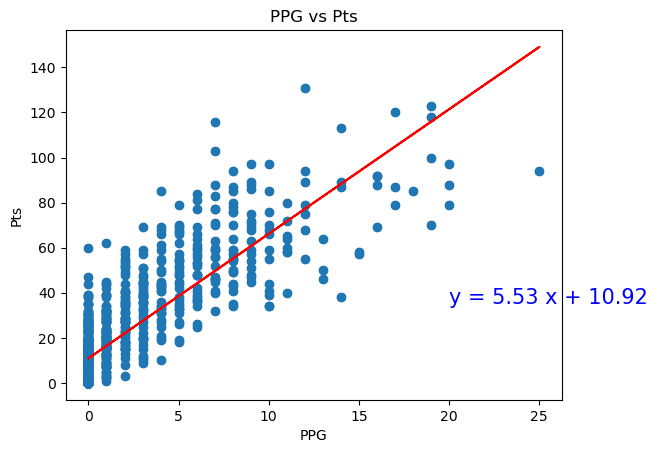

The correlation between PPG vs Pts is 0.83. This graph clearly depicts the correlation between scoring PPG and resulting in an overall increase in points


In [95]:
ppg_vs_pts = plt.scatter(winning_df["PPG"],winning_df["Pts"],edgecolors='black',marker='o',alpha=0.75,s=30)

correlation_co = st.pearsonr(winning_df["PPG"],winning_df["Pts"])

#Calculate linear regression
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(winning_df["PPG"],winning_df["Pts"])
regress_values=winning_df["PPG"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(winning_df["PPG"],winning_df["Pts"],color='tab:blue')
plt.plot(winning_df["PPG"], regress_values, color='red')
plt.annotate(line_eq,(15,0), fontsize=15, color = "blue")
plt.xlabel("PPG")
plt.ylabel("Pts")
plt.title("PPG vs Pts")
# Save the figure
plt.savefig("output/Fig4.png")
plt.show()
#Print the correlation answer
print(f"The correlation between PPG vs Pts is {round(correlation_co[0],2)}. This graph clearly depicts the correlation between scoring PPG and resulting in an overall increase in points")


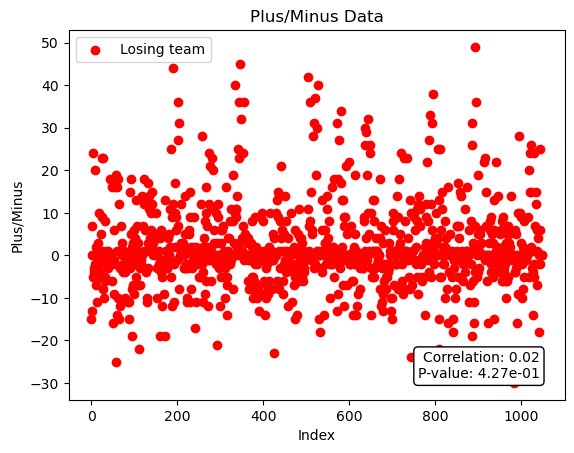

In [88]:
#Scatter plot for losing team +/-
# Remove gridlines
plt.grid(False)

# Scatter plot for losing team
plt.scatter(range(len(plus_mins_lose)), plus_mins_lose, color='red', label='Losing team')

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(range(len(plus_mins_lose)), plus_mins_lose)

# Add correlation and p-value to the plot
plt.text(0.95, 0.05, f"Correlation: {corr:.2f}\nP-value: {p_value:.2e}", transform=plt.gca().transAxes,
         ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Set plot title and labels
plt.title('Plus/Minus Data')
plt.xlabel('Index')
plt.ylabel('Plus/Minus')

# Display legend
plt.legend()

# Save the figure
plt.savefig("output/Fig5.png")
# Show the plot
plt.show()



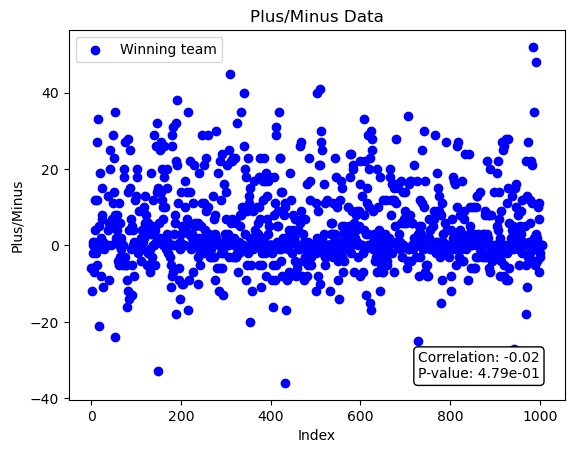

In [89]:
# scatter plot for winning team +/-
# Remove gridlines
plt.grid(False)

# Scatter plot for losing team
plt.scatter(range(len(plus_mins_win)), plus_mins_win, color='blue', label='Winning team')

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(range(len(plus_mins_win)), plus_mins_win)

# Add correlation and p-value to the plot
plt.text(0.95, 0.05, f"Correlation: {corr:.2f}\nP-value: {p_value:.2e}", transform=plt.gca().transAxes,
         ha='right', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

# Set plot title and labels
plt.title('Plus/Minus Data')
plt.xlabel('Index')
plt.ylabel('Plus/Minus')

# Display legend
plt.legend()

# Save the figure
plt.savefig("output/Fig6.png")

# Show the plot
plt.show()




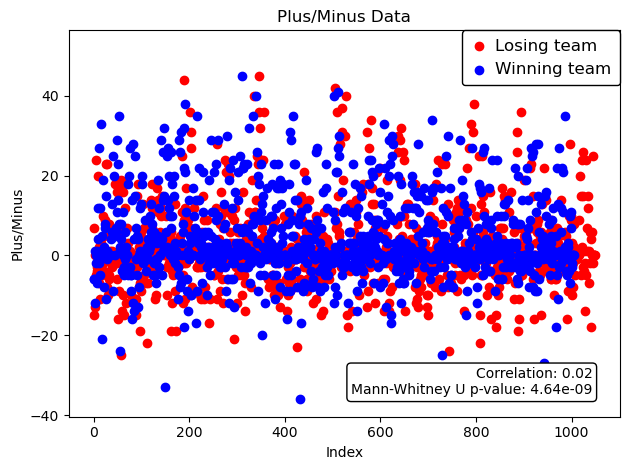

Of the 2000+ entries, +2 to -2 is very dense.  The winning team (blue) has a slightly above 0 stonger representation with an average +/- of slightly above 4 and the losing team at 2.  When compare the two sets of values, the p-value supports that there is a very strong correlation between a more positive +/- and winning.


In [90]:
# scatter plot comparison, winning vs losing with mannwhitneyu pvalue calculation
# Remove gridlines
plt.grid(False)

# Scatter plot for losing team
plt.scatter(range(len(plus_mins_lose)), plus_mins_lose, color='red', label='Losing team')

# Scatter plot for winning team
plt.scatter(range(len(plus_mins_win)), plus_mins_win, color='blue', label='Winning team')

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(range(len(plus_mins_lose)), plus_mins_lose)

# Calculate Mann-Whitney U test for p-value
mwu, mwu_pvalue = mannwhitneyu(plus_mins_win, plus_mins_lose, alternative='two-sided')

# Add correlation and p-value to the plot
text_box_props = dict(facecolor='white', edgecolor='black', boxstyle='round')
plt.text(0.95, 0.05, f"Correlation: {corr:.2f}\nMann-Whitney U p-value: {mwu_pvalue:.2e}", transform=plt.gca().transAxes,
         ha='right', va='bottom', bbox=text_box_props)

# Set plot title and labels
plt.title('Plus/Minus Data')
plt.xlabel('Index')
plt.ylabel('Plus/Minus')

# Create a legend with a box
legend_box_props = dict(facecolor='white', edgecolor='black', boxstyle='round')
plt.legend(prop={'size': 12}, loc='upper right', bbox_to_anchor=(1.0, 1.0), borderaxespad=0., framealpha=1.0, frameon=True, handlelength=1, handletextpad=0.5, labelspacing=0.5, borderpad=0.5, fancybox=True)

# Add box around the legend
legend_box = plt.gca().get_legend()
legend_box.set_frame_on(True)
legend_box.get_frame().set_edgecolor('black')
legend_box.get_frame().set_facecolor('white')
legend_box.get_frame().set_linestyle('-')

# Show the plot
plt.tight_layout()
# Save the figure
plt.savefig("output/Fig7.png")
plt.show()

print(f"Of the 2000+ entries, +2 to -2 is very dense.  The winning team (blue) has a slightly above 0 stonger representation with an average +/- of slightly above 4 and the losing team at 2.  When compare the two sets of values, the p-value supports that there is a very strong correlation between a more positive +/- and winning.")

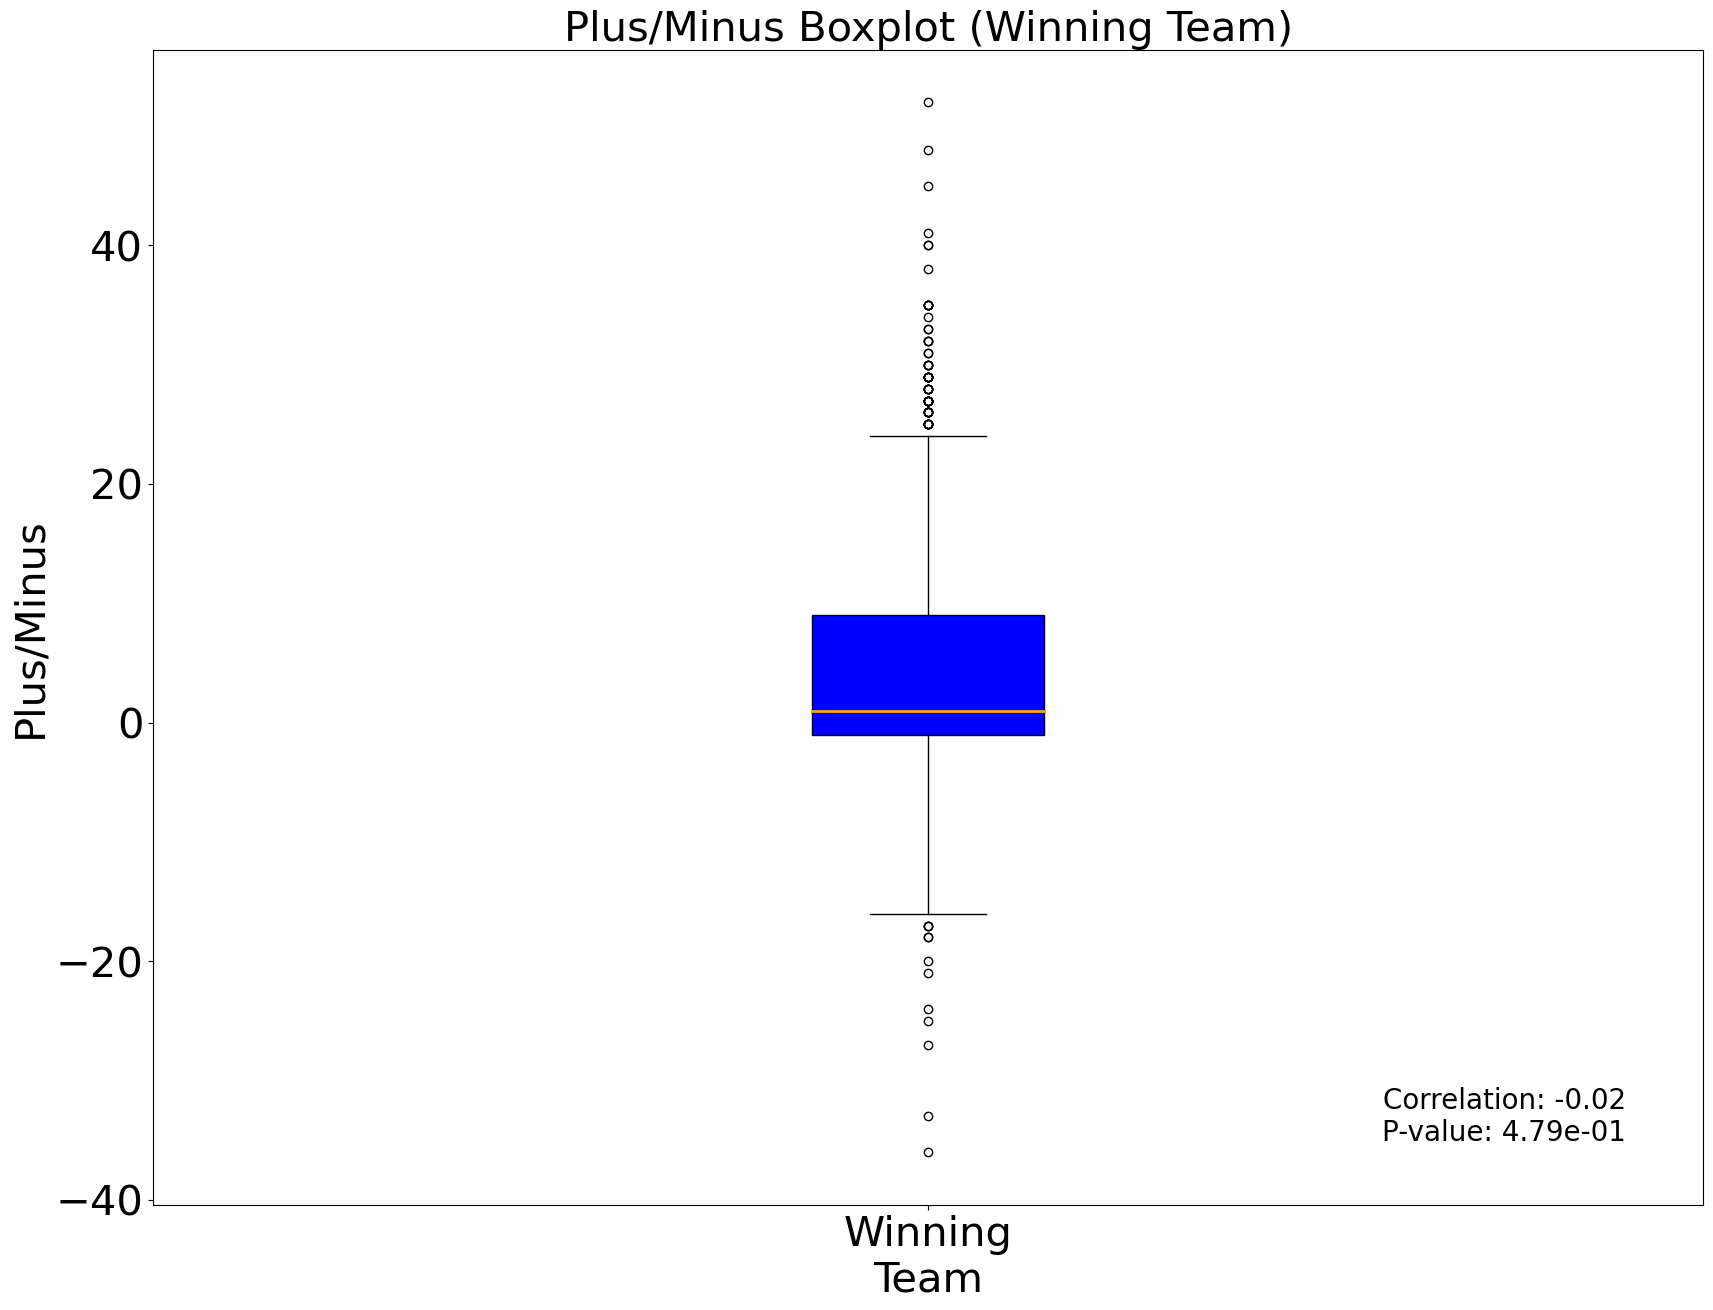

In [91]:
#box plot for winning team +/-
#Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Create the boxplot for the winning team with blue fill color
boxplot = ax.boxplot(plus_mins_win, labels=["Winning"], patch_artist=True)
colors = ['blue']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color and opacity of the outliers to blue
for flier in boxplot['fliers']:
    flier.set(marker='o', color='blue', alpha=1.0)

# Set the mean line color to orange and make it bold
for median in boxplot['medians']:
    median.set(color='orange', linewidth=2)

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(range(len(plus_mins_win)), plus_mins_win)

# Add correlation and p-value to the plot with larger font size
ax.text(0.95, 0.05, f"Correlation: {corr:.2f}\nP-value: {p_value:.2e}", transform=ax.transAxes,
        ha='right', va='bottom', fontsize=20)

# Set the plot title and labels with larger font size
ax.set_title("Plus/Minus Boxplot (Winning Team)", fontsize=30)
ax.set_xlabel("Team", fontsize=30)
ax.set_ylabel("Plus/Minus", fontsize=30)

# Set the font size of the tick labels
ax.tick_params(axis='both', labelsize=30)

# Save the figure
plt.savefig("output/Fig8.png")
# Display the plot
plt.show()




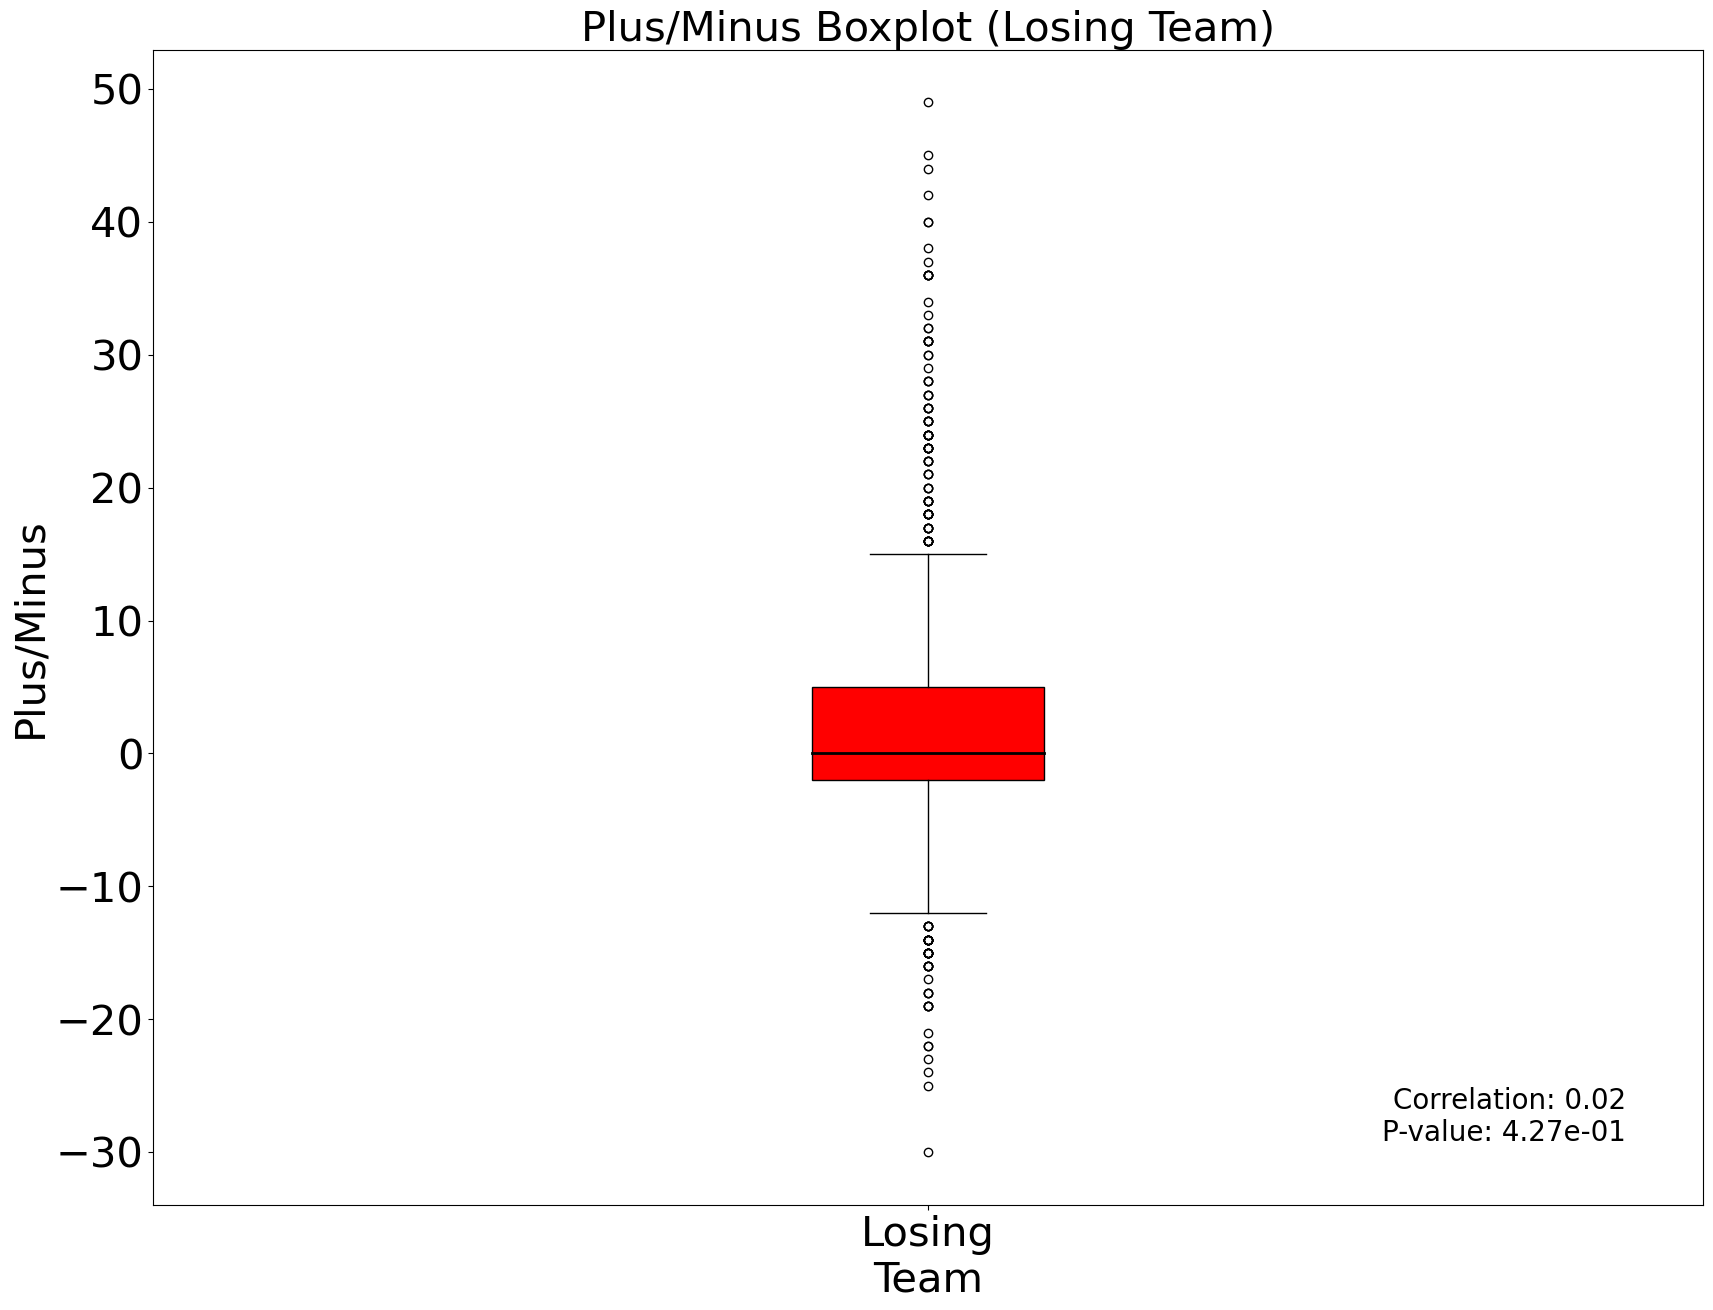

In [92]:
#boxplot for losing team +/-
# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Create the boxplot for the winning team with blue fill color
boxplot = ax.boxplot(plus_mins_lose, labels=["Losing"], patch_artist=True)
colors = ['red']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Set the color and opacity of the outliers to blue
for flier in boxplot['fliers']:
    flier.set(marker='o', color='orange', alpha=1.0)

# Set the mean line color to orange and make it bold
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)

# Calculate correlation coefficient and p-value
corr, p_value = pearsonr(range(len(plus_mins_lose)), plus_mins_lose)

# Add correlation and p-value to the plot with larger font size
ax.text(0.95, 0.05, f"Correlation: {corr:.2f}\nP-value: {p_value:.2e}", transform=ax.transAxes,
        ha='right', va='bottom', fontsize=20)

# Set the plot title and labels with larger font size
ax.set_title("Plus/Minus Boxplot (Losing Team)", fontsize=30)
ax.set_xlabel("Team", fontsize=30)
ax.set_ylabel("Plus/Minus", fontsize=30)

# Set the font size of the tick labels
ax.tick_params(axis='both', labelsize=30)
# Save the figure
plt.savefig("output/Fig9.png")
# Display the plot
plt.show()


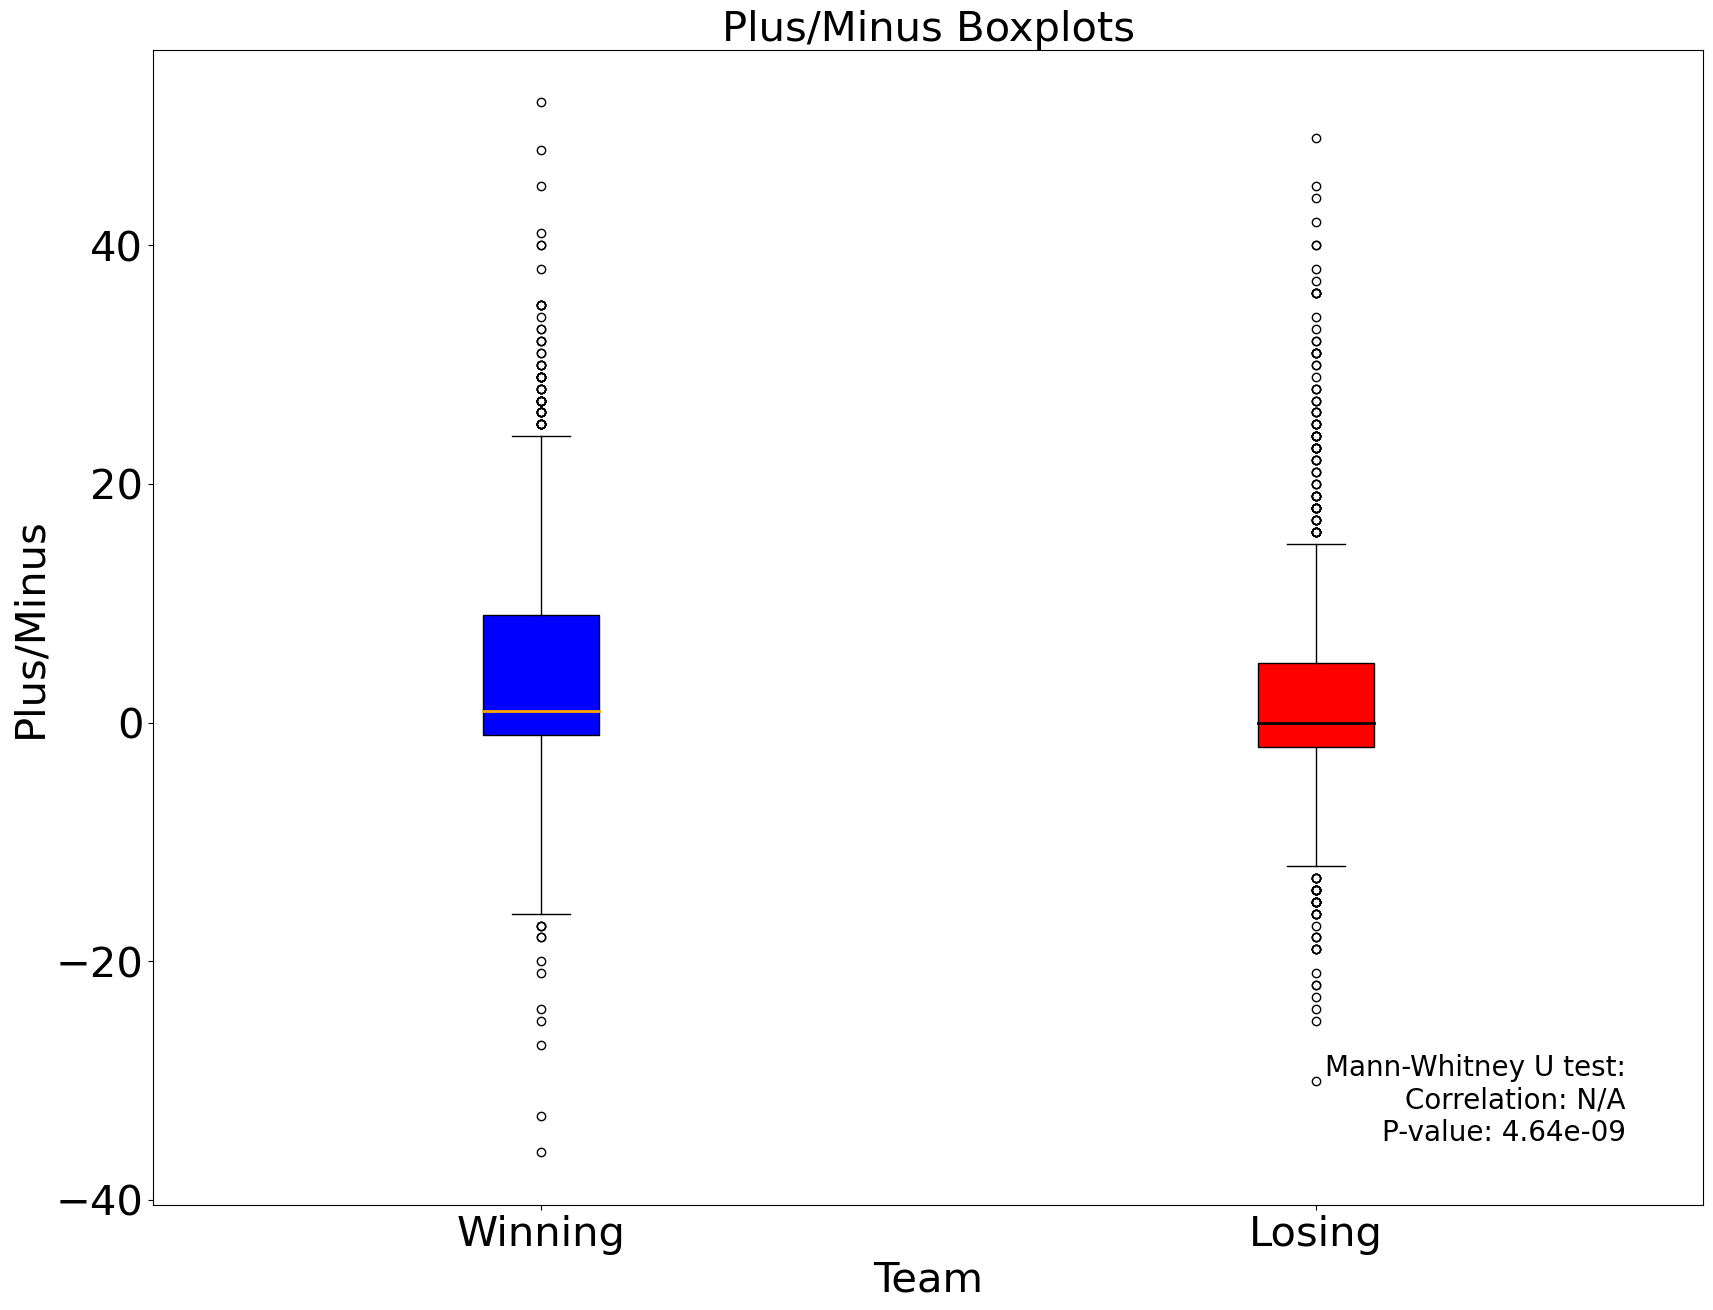

The results of the box plots depicts how the winning team has far more consistency amongst it's players.  This is also supported by having less outliers then the losing team at each extremety.


In [93]:
# boxplot for winning vs losing team +/-, using mannwhitneyu calc for pvalue
# Create the figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Create the boxplot for the winning team with blue fill color
boxplot1 = ax.boxplot(plus_mins_win, positions=[1], labels=["Winning"], patch_artist=True)
colors1 = ['blue']
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

# Set the color and opacity of the outliers to blue
for flier in boxplot1['fliers']:
    flier.set(marker='o', color='blue', alpha=1.0)

# Set the mean line color to orange and make it bold
for median in boxplot1['medians']:
    median.set(color='orange', linewidth=2)

# Create the boxplot for the losing team with orange fill color
boxplot2 = ax.boxplot(plus_mins_lose, positions=[2], labels=["Losing"], patch_artist=True)
colors2 = ['red']
for patch, color in zip(boxplot2['boxes'], colors2):
    patch.set_facecolor(color)

# Set the color and opacity of the outliers to orange
for flier in boxplot2['fliers']:
    flier.set(marker='o', color='orange', alpha=1.0)

# Set the mean line color to black and make it bold
for median in boxplot2['medians']:
    median.set(color='black', linewidth=2)

# Calculate correlation coefficient and p-value using Mann-Whitney U test
statistic, p_value = mannwhitneyu(plus_mins_win, plus_mins_lose, alternative='two-sided')

# Add correlation and p-value to the plot with larger font size
ax.text(0.95, 0.05, f"Mann-Whitney U test:\nCorrelation: N/A\nP-value: {p_value:.2e}",
        transform=ax.transAxes, ha='right', va='bottom', fontsize=20)

# Set the plot title and labels with larger font size
ax.set_title("Plus/Minus Boxplots", fontsize=30)
ax.set_xlabel("Team", fontsize=30)
ax.set_ylabel("Plus/Minus", fontsize=30)

# Set the font size of the tick labels
ax.tick_params(axis='both', labelsize=30)

# Set the x-axis limits
ax.set_xlim(0.5, 2.5)
# Save the figure
plt.savefig("output/Fig10.png")
# Display the plot
plt.show()


print(f"The results of the box plots depicts how the winning team has far more consistency amongst it's players.  This is also supported by having less outliers then the losing team at each extremety.")

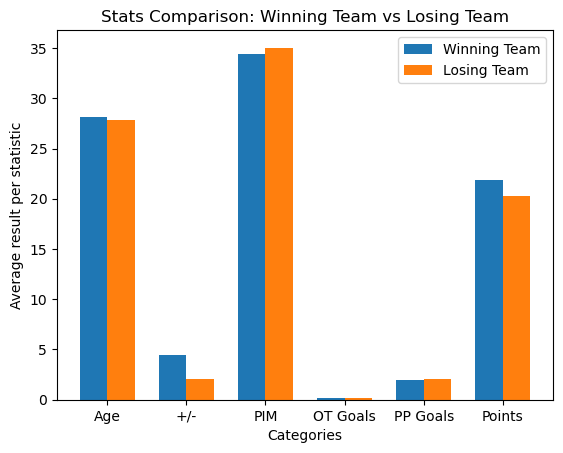

When comparing the identified key stats for the season between the winning and losing team, it is apparent that the one stat with the most material difference and impact is the '+/-'.


In [94]:
# Comparison bar graph for defined stats, winning vs losing team
categories = ['Age','+/-', 'PIM', 'OT Goals', 'PP Goals', 'Points']
winning_stats = [28.1, 4.5, 34.36, 0.14, 2.0, 21.9]
losing_stats = [27.8, 2.1, 35.03, 0.13, 2.1, 20.3]

# Set the positions of the bars on the x-axis
bar_width = 0.35
bar_positions = np.arange(len(categories))

# Create the figure and axes
fig, ax = plt.subplots()

# Plot the winning team's stats
ax.bar(bar_positions, winning_stats, bar_width, label='Winning Team')

# Plot the losing team's stats
ax.bar(bar_positions + bar_width, losing_stats, bar_width, label='Losing Team')

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Average result per statistic')
ax.set_title('Stats Comparison: Winning Team vs Losing Team')

# Set x-axis tick labels
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(categories)

# Add a legend
ax.legend()

# Save the figure
plt.savefig("output/Fig11.png")

# Display the plot
plt.show()

print(f"When comparing the identified key stats for the season between the winning and losing team, it is apparent that the one stat with the most material difference and impact is the '+/-'.")

Final Analysis/Conclusion:

- Based on our overall analysis and supporting data, there is no material difference regarding age groups and winning.  Years of experience requires additional analysis.
- There should be a heightened focus on recruiting European players.  Their hockey programs have significantly evolved, and the number of European players playing in the NHL is showing a steady increase, while the Canadian player representation is reducing.
- More PPG equates to a higher overall point value and not a substitute for regular goals.
- It is favorable and improves the likelihood of winning to have more consistency amongst contributing players vs having one or two superstars on the team.  The box plot comparing the +/- statistic supports this theor as the winning team has less outliers and more consistency when comparing the winning and losing team.  The +/- statistic is also the only key statistic analyzed that has a material difference(100% increase) in results when comparing the winning and losing team.
- Future analysis reviewing Stanley Cup Finals' data only, can provide greater variability in data points and provide additional trending, influencing additional recommendations.